# TURS on mixed-type data

In [1]:
import pandas as pd

import capnp
capnp.remove_import_hook()
interface_capnp = capnp.load("../../cpp-tool/capnproto/interface.capnp", imports=["/usr/local/include"])

import sys
sys.path.append("../..")
from experiments.evaluation import Evaluator

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /root/.vscode-server/bin/6c3e3dba23e8fadc360aed75ce363ba185c49794


In [2]:
client = capnp.TwoPartyClient("cpp-tool:21654")
processDataUpdatesCpp = client.bootstrap().cast_as(interface_capnp.ProcessDataUpdates)

In [3]:
# initialize objects
evaluator = Evaluator(interface_capnp, processDataUpdatesCpp)
metrics = ["complexity", "valueSetF1"]

## Evaluating experiments

In [4]:
experimentTable = evaluator.createExperimentTable("tursMixedType",
    r"(\d\.\d+)?-(\d+)?-(\d+)-(\d+)?-(.+)-model\.bin",
    ["noiseProportion", "logLength", "modelID", "logVariant", "method"])

In [5]:
evaluator.addMetricsToExperimentTable("tursMixedType", experimentTable, metrics)

Computing valueSetF1: 100%|██████████| 820/820 [00:56<00:00, 14.52it/s]


In [6]:
experimentTable.to_csv("tursMixedTypeTable.csv")

## Visualizing experiments

In [8]:
experimentTable = pd.read_csv("tursMixedTypeTable.csv")

In [9]:
# fix datatypes
experimentTable.logLength = pd.to_numeric(experimentTable.logLength)
experimentTable.noiseProportion = pd.to_numeric(experimentTable.noiseProportion)

In [10]:
# aggregate data for plot
aggregationColumns = ["logLength", "noiseProportion", "method"]

tableAggregated = evaluator.aggregateMetrics(experimentTable, aggregationColumns, metrics)

### Plots

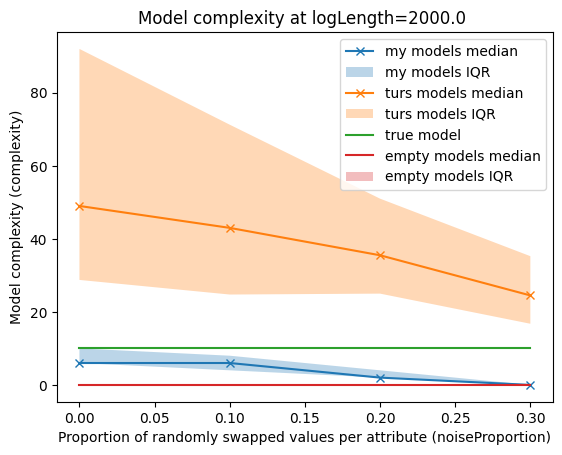

In [11]:
evaluator.plotScoreWithIqr(tableAggregated, "complexity", "noiseProportion", ["logLength"],
                           ["my", "turs", "true", "empty"])

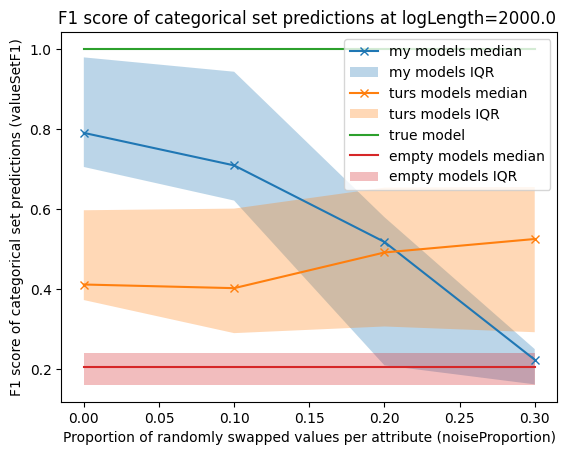

In [12]:
evaluator.plotScoreWithIqr(tableAggregated, "valueSetF1", "noiseProportion", ["logLength"],
                           ["my", "turs", "true", "empty"])

### LaTeX exports

In [13]:
def extractMetricForPgfplots(aggregatedTable, metricName, fileName):
    metric = aggregatedTable[metricName]
    metric = metric.drop([0.4, 0.5], level=1, axis="index", errors="ignore")
    metric["lowIqr"] = metric["midIqr"] - metric["lowIqr"]
    metric["highIqr"] = metric["highIqr"] - metric["midIqr"]
    metric = metric.rename(columns={"lowIqr": "relative lowIqr", "highIqr": "relative highIqr"})
    metric.to_csv("../../document/figs/" + fileName)

In [14]:
extractMetricForPgfplots(tableAggregated, "valueSetF1", "prediction-f1-turs-mixed.csv")

In [15]:
extractMetricForPgfplots(tableAggregated, "complexity", "complexity-turs-mixed.csv")